**Problem 1** 🧀🧀 Implement Golden Section Search (GSS) in Python.

Given the function $f(x) = x^4 - 3x^3 + 2x$ on the interval $[0, 3]$:

**Starting point:** You have 3 points:
- Left endpoint: $a$
- Right endpoint: $b$  
- Current guess: $x_c$ (initially, could be the midpoint)

**In each iteration:** Generate **one new guess** $x_{\text{new}}$ and evaluate $f(x_{\text{new}})$. Compare with $f(x_c)$ to decide which sub-interval to keep. 

### Part (a): Random vs Golden Ratio Selection

a) Implement GSS with **random guess selection**: Generate the new guess $x_{\text{new}}$ randomly within the current interval $[a, b]$ using `np.random.uniform(a, b)`.

b) Implement GSS with **golden ratio** ($\phi = \frac{1 + \sqrt{5}}{2}$): Generate the new guess $x_{\text{new}}$ using the golden ratio formula. 

c) Compare both methods:
   - Run each method with `max_iter=50`
   - Plot the convergence: iteration number vs. interval length
   - Plot the iteration number vs distance to true minimum

### Part (b): Maximum Iterations for Tolerance

For Golden Section Search on interval $[a, b]$.

d) Derive the formula for the number of iterations $n$ needed to reduce the interval to length $\epsilon$.


e) Given $[a, b] = [0, 10]$ and tolerance $\epsilon = 10^{-6}$, how many iterations are required?

f) Implement a function `max_iterations_for_tolerance(a, b, epsilon)` that returns the required number of iterations.

g) Verify your formula by running GSS and checking when the interval length first becomes $< \epsilon$.

### Part (c): Early Stopping Criteria

Add both **absolute** and **relative** stopping criteria to your Golden Section Search implementation:

**Absolute criterion:** Stop if $|f(x^{(k+1)}) - f(x^{(k)})| < \varepsilon_{\text{abs}}$

**Relative criterion:** Stop if $\frac{|f(x^{(k+1)}) - f(x^{(k)})|}{|f(x^{(k)})| + \delta} < \varepsilon_{\text{rel}}$

where $\delta = 10^{-10}$ is a small constant to avoid division by zero.

h) Implement `golden_section_search_with_stopping(f, a, b, max_iter, eps_abs, eps_rel)`

i) Test on $f(x) = (x-2)^2 + 0.001$ on $[0, 4]$ with:
   - `eps_abs = 1e-6`
   - `eps_rel = 1e-4`
   - `max_iter = 100`

j) Report which stopping criterion was triggered and at which iteration.


In [82]:
import numpy as np
import matplotlib.pyplot as plt

# fix the state
np.random.seed(509)

def func(x):
    return x**4 - 3*x**3 + 2*x


def gss_initial(f, left, right, current, max_iter=1_000):
    f_left = f(left)
    f_right = f(right)
    f_current = f(current)


    estimates = []

    for i in range(max_iter):
        new = np.random.uniform(left, right)
        f_new = f(new)

        print(new, f_new)
        
        if new < current:
            if f_new <= f_current:
                right, f_right = current, f_current
                current, f_current = new, f_new
            else:
                left, f_left = new, f_new
        else:
            if f_new <= f_current:
                left, f_left = current, f_current
                current, f_current = new, f_new 
            else:
                right, f_right = new, f_new
                
        estimates.append((left + right) / 2)
        
        if abs(right - left) < 1e-6:
            break
        
        # print(f"Iteration {i}")
        # print(f"Left: {left}, f(Left): {f_left}")
        # print(f"Right: {right}, f(Right): {f_right}")
        # print(f"Current: {current}, f(Current): {f_current}")
        # print(f"Estimates: {estimates[-1]}\n")
    return estimates

1.1964601486821578 -0.6960978275319349
2.674605762561301 -0.8765027546005904
2.6639935650416913 -1.0245484929188855
1.7724976774194476 -3.2906472328708523
2.4330625967071966 -3.299603707434909
2.1663143945414327 -4.1428991419423715
1.906524058481448 -3.7646291066102653
2.4131590720029115 -3.420344865300118
2.0290658500269854 -4.052939266914474
2.208172295027654 -4.109345915049781
Num iters 10


Text(0.5, 1.0, 'Function Visualization with Initial Points')

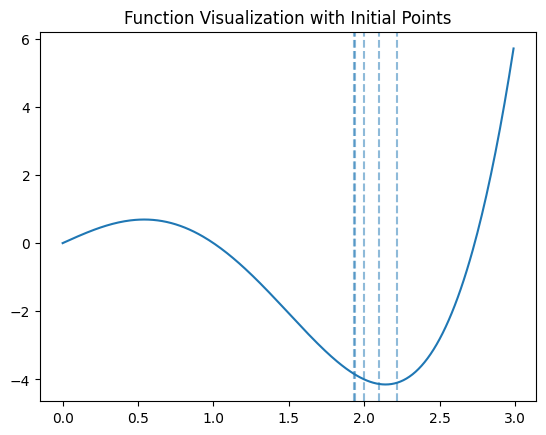

In [87]:

LEFT = 0
RIGHT = 3
CURRENT = 1

estimates = gss_initial(func, LEFT, RIGHT, CURRENT, 10)

print(f"Num iters {len(estimates)}")

x = np.arange(LEFT, RIGHT, 0.01)
f_x = func(x)


plt.plot(x, f_x, label='f(x)')
# plt.scatter([LEFT, RIGHT, CURRENT], [func(LEFT), func(RIGHT), func(CURRENT)], color='red')

# plot first 5 estimates
for i, est in enumerate(estimates[:5]):
    plt.axvline(x=est, linestyle='--', alpha=0.5, label=f'Estimate {i+1}')

plt.title('Function Visualization with Initial Points')

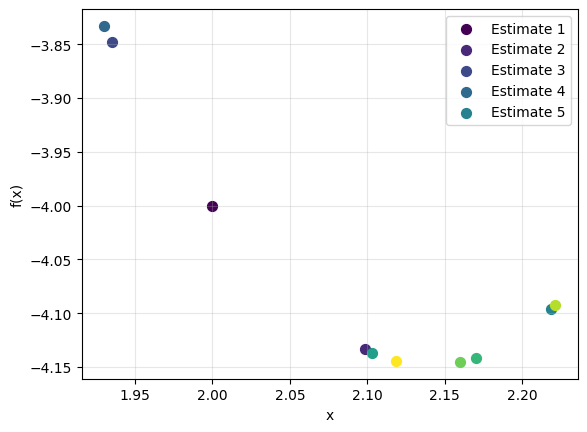

In [88]:
# Color the estimates by their index
colors = plt.cm.viridis(np.linspace(0, 1, len(estimates)))
for i, (est, color) in enumerate(zip(estimates, colors)):
    plt.scatter(est, func(est), color=color, s=50, label=f'Estimate {i+1}' if i < 5 else '')

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.show()


In [19]:
estimates[-1], x_min

(1.8662276801125428, 2.140913288808422)

In [9]:
def true_min_on_interval(f, a, b):
    # derivative: 4x^3 - 9x^2 + 2
    coeff = [4.0, -9.0, 0.0, 2.0]  # 4x^3 - 9x^2 + 0x + 2
    roots = np.roots(coeff)
    candidates = [a, b]
    for r in roots:
        if np.isreal(r):
            rr = float(np.real(r))
            if a <= rr <= b:
                candidates.append(rr)
    vals = [(x, f(x)) for x in candidates]
    x_star, f_star = min(vals, key=lambda t: t[1])
    return x_star, f_star

In [11]:
x_min, _ = true_min_on_interval(func, LEFT, RIGHT)

# GSS Proper

In [89]:
def gss_initial(f, left, right, current, max_iter=1_000):
    f_left = f(left)
    f_right = f(right)
    f_current = f(current)

    estimates = []

    for i in range(max_iter):
        new = np.random.uniform(left, right)
        f_new = f(new)

        print(new, f_new)
        
        if new < current:
            if f_new <= f_current:
                right, f_right = current, f_current
                current, f_current = new, f_new
            else:
                left, f_left = new, f_new
        else:
            if f_new <= f_current:
                left, f_left = current, f_current
                current, f_current = new, f_new 
            else:
                right, f_right = new, f_new
                
        estimates.append((left + right) / 2)
        # print(f"Iteration {i}")
        # print(f"Left: {left}, f(Left): {f_left}")
        # print(f"Right: {right}, f(Right): {f_right}")
        # print(f"Current: {current}, f(Current): {f_current}")
        # print(f"Estimates: {estimates[-1]}\n")
    return estimates

In [ ]:
def gss(f, left, right, tol=10e-2, max_iter=1_000):
    phi = (1 + 5 ** 0.5) / 2  # golden ratio
    
    f_left = f(left)
    f_right = f(right)
    
    interval_length = right - left
    
    x1 = left  + (1-1/phi) * interval_length
    x2 = right - (1-1/phi) * interval_length
    
    f_x1 = f(x1)
    f_x2 = f(x2)
    
    estimates = []
    
    for i in range(max_iter):
        print(f"Iter {i}: {left:.3f} {x1:.3f} {x2:.3f} {right:.3f}")
        if f_x1 < f_x2:
            # Keep left interval [left, x2], discard [x2, right]
            right = x2
            f_right = f_x2
            x2 = x1
            f_x2 = f_x1
            interval_length = right - left
            x1 = left + (1 - 1/phi) * interval_length
            f_x1 = f(x1)
        else:
            # Keep right interval [x1, right], discard [left, x1]
            left = x1
            f_left = f_x1
            x1 = x2
            f_x1 = f_x2
            interval_length = right - left
            x2 = right - (1 - 1/phi) * interval_length
            f_x2 = f(x2)

        x1, x2 = min(x1, x2), max(x1, x2)

        if abs(right - left) < tol:
            break


        estimates.append((left + right) / 2)
    
    return estimates
                

In [136]:
phi = (1 + 5 ** 0.5) / 2  # golden ratio

1 / phi

0.6180339887498948

In [137]:
2 - phi

0.3819660112501051

In [138]:
1 - (1/phi)

0.3819660112501052

In [139]:
phi - 1

0.6180339887498949

In [140]:
interval_len = 3 

tol = 10e-5 # 0.00001

np.log(interval_len / tol) / np.log(phi)

21.422899695715945

In [141]:
estimates = gss(func, LEFT, RIGHT, 10e-20)
print(estimates)

print("Num Iterations:", len(estimates))

Iter 0: 0.000 1.146 1.854 3.000
Iter 1: 1.146 1.854 2.292 3.000
Iter 2: 1.854 2.292 2.562 3.000
Iter 3: 1.854 2.125 2.292 2.562
Iter 4: 1.854 2.021 2.125 2.292
Iter 5: 2.021 2.125 2.188 2.292
Iter 6: 2.021 2.085 2.125 2.188
Iter 7: 2.085 2.125 2.149 2.188
Iter 8: 2.125 2.149 2.164 2.188
Iter 9: 2.125 2.140 2.149 2.164
Iter 10: 2.125 2.134 2.140 2.149
Iter 11: 2.134 2.140 2.143 2.149
Iter 12: 2.134 2.137 2.140 2.143
Iter 13: 2.137 2.140 2.141 2.143
Iter 14: 2.140 2.141 2.142 2.143
Iter 15: 2.140 2.141 2.141 2.142
Iter 16: 2.141 2.141 2.141 2.142
Iter 17: 2.141 2.141 2.141 2.141
Iter 18: 2.141 2.141 2.141 2.141
Iter 19: 2.141 2.141 2.141 2.141
Iter 20: 2.141 2.141 2.141 2.141
Iter 21: 2.141 2.141 2.141 2.141
Iter 22: 2.141 2.141 2.141 2.141
Iter 23: 2.141 2.141 2.141 2.141
Iter 24: 2.141 2.141 2.141 2.141
Iter 25: 2.141 2.141 2.141 2.141
Iter 26: 2.141 2.141 2.141 2.141
Iter 27: 2.141 2.141 2.141 2.141
Iter 28: 2.141 2.141 2.141 2.141
Iter 29: 2.141 2.141 2.141 2.141
Iter 30: 2.141 2.141

Text(0.5, 1.0, 'Function Visualization with Initial Points')

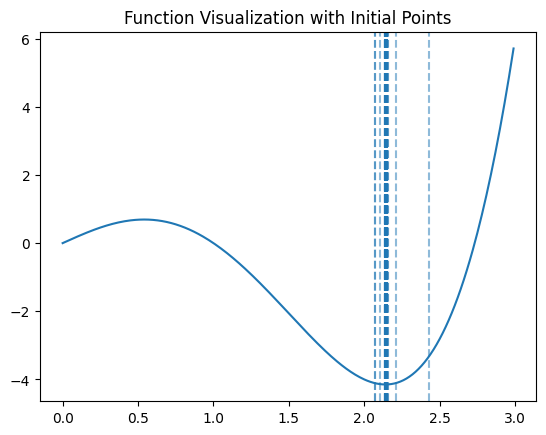

In [142]:
x = np.arange(LEFT, RIGHT, 0.01)
f_x = func(x)


plt.plot(x, f_x, label='f(x)')
# plt.scatter([LEFT, RIGHT, CURRENT], [func(LEFT), func(RIGHT), func(CURRENT)], color='red')

# plot first 5 estimates
for i, est in enumerate(estimates):
    plt.axvline(x=est, linestyle='--', alpha=0.5, label=f'Estimate {i+1}')

plt.title('Function Visualization with Initial Points')